In [2]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis import transformations as trans

In [3]:
import matplotlib.pyplot as plt

In [1]:
from WatAnalysis.temp import SelectedTemperature as ST
from WatAnalysis import utils

/data/home/jxzhu/.conda/envs/gnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

In [4]:
# load trajectory
u = mda.Universe("data/interface.psf", "data/trajectory.xyz")
dim = [11.246, 11.246, 35.94, 90, 90, 90]
transform = trans.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)

In [5]:
u_vels = mda.Universe("data/velocity.xyz")

In [6]:
ag = u.select_atoms("name O or name H")
# vel = "data/velocity.xyz"
job = ST(ag, u_vels)

In [7]:
job.run()

/data/jxzhu/software/mdanalysis-package-2.3.0/package/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


In [8]:
temp = job.temperature

344.11913307747693


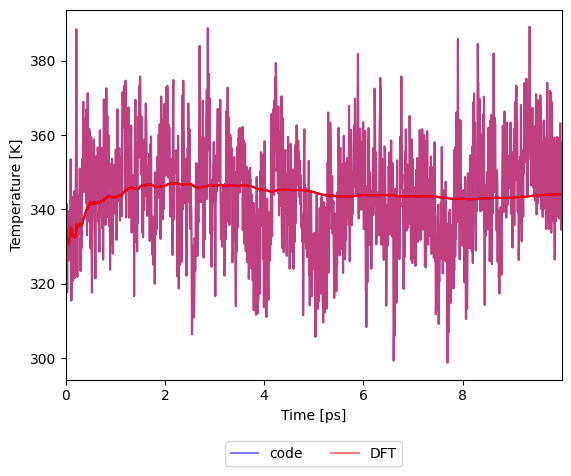

In [11]:
dt = 0.5 / 1000 * 10
t = np.arange(len(temp)) * dt

dft_temp = np.loadtxt("data/dft_temp.txt")

plt.plot(t, temp, color="blue", alpha=0.5, label="code")
plt.plot(t, utils.get_cum_ave(temp), color="blue")
plt.plot(t, dft_temp[:, 0], color="red", alpha=0.5, label="DFT")
plt.plot(t, utils.get_cum_ave(dft_temp[:, 0]), color="red")

print(utils.get_cum_ave(temp)[-1])

plt.xlim(t.min(), t.max())
plt.xlabel("Time [ps]")
plt.ylabel("Temperature [K]")
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0)

plt.savefig("water_temp.png", bbox_inches="tight")
plt.show()